In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
from pathlib import Path

plt.style.use('style')

In [2]:
# Ruta a Figures desde el notebook actual
fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

def savefig(name, ext="pdf"):
    from pathlib import Path
    import matplotlib.pyplot as plt

    fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
    fig_dir.mkdir(parents=True, exist_ok=True)
    path = fig_dir / f"{name}.{ext}"
    plt.savefig(path, bbox_inches="tight", dpi=300)
    print(f"✅ Figura guardada en {path}")

In [3]:
common_params = {
    'h': 0.6736,
    'omega_b': 0.02237,
    'omega_cdm': 0.1200,
    'tau_reio': 0.0544,
    'output': 'tCl,pCl,lCl',
    'lensing': 'yes',
    'l_max_scalars': 2500,
}

In [4]:
ruta_archivo = '/Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Analysis/Pr_dense_input_NORMALIZADO2.dat'

params_model = common_params.copy()
params_model.update({
    'P_k_ini type': 'external_Pk',
    'command': f"cat '{ruta_archivo}'"
    # Estos se ignoran en modo externo, pero evitan warnings
 
})

print("Calculando Higgs-R^2...")
cosmo_model = Class()
cosmo_model.set(params_model)
cosmo_model.compute()
cls_model = cosmo_model.lensed_cl(2500)
cosmo_model.struct_cleanup() # Limpiar memoria

# --- 3. CALCULAR MODELO DE STOCK (LambdaCDM) ---
# Aquí NO usamos external_Pk, dejamos que CLASS use la ley de potencias
params_ref = common_params.copy()
params_ref.update({
    'A_s': 2.1e-9,   # Amplitud estándar
    'n_s': 0.9649    # Índice espectral estándar
})


Calculando Higgs-R^2...


In [5]:
print("Calculando LambdaCDM de referencia...")
cosmo_ref = Class()
cosmo_ref.set(params_ref)
cosmo_ref.compute()
cls_ref = cosmo_ref.lensed_cl(2500)
cosmo_ref.struct_cleanup()

Calculando LambdaCDM de referencia...


In [6]:
ll = cls_ref['ell'][2:] # Empezamos en l=2

# Factor de conversión a muK^2
Tcmb = 2.7255e6 # micro Kelvin
factor = ll * (ll + 1) / (2 * np.pi) * (Tcmb**2)

clTT_model = cls_model['tt'][2:] * factor
clTT_model = cls_model['tt'][2:] * factor
clEE_model = cls_model['ee'][2:] * factor
clTE_model = cls_model['te'][2:] * factor

clTT_ref   = cls_ref['tt'][2:]   * factor
clTT_ref = cls_ref['tt'][2:] * factor
clEE_ref = cls_ref['ee'][2:] * factor
clTE_ref = cls_ref['te'][2:] * factor

# Diferencia relativa (Residuales)
diff = (clTT_model - clTT_ref) / clTT_ref

(-0.4, 0.2)

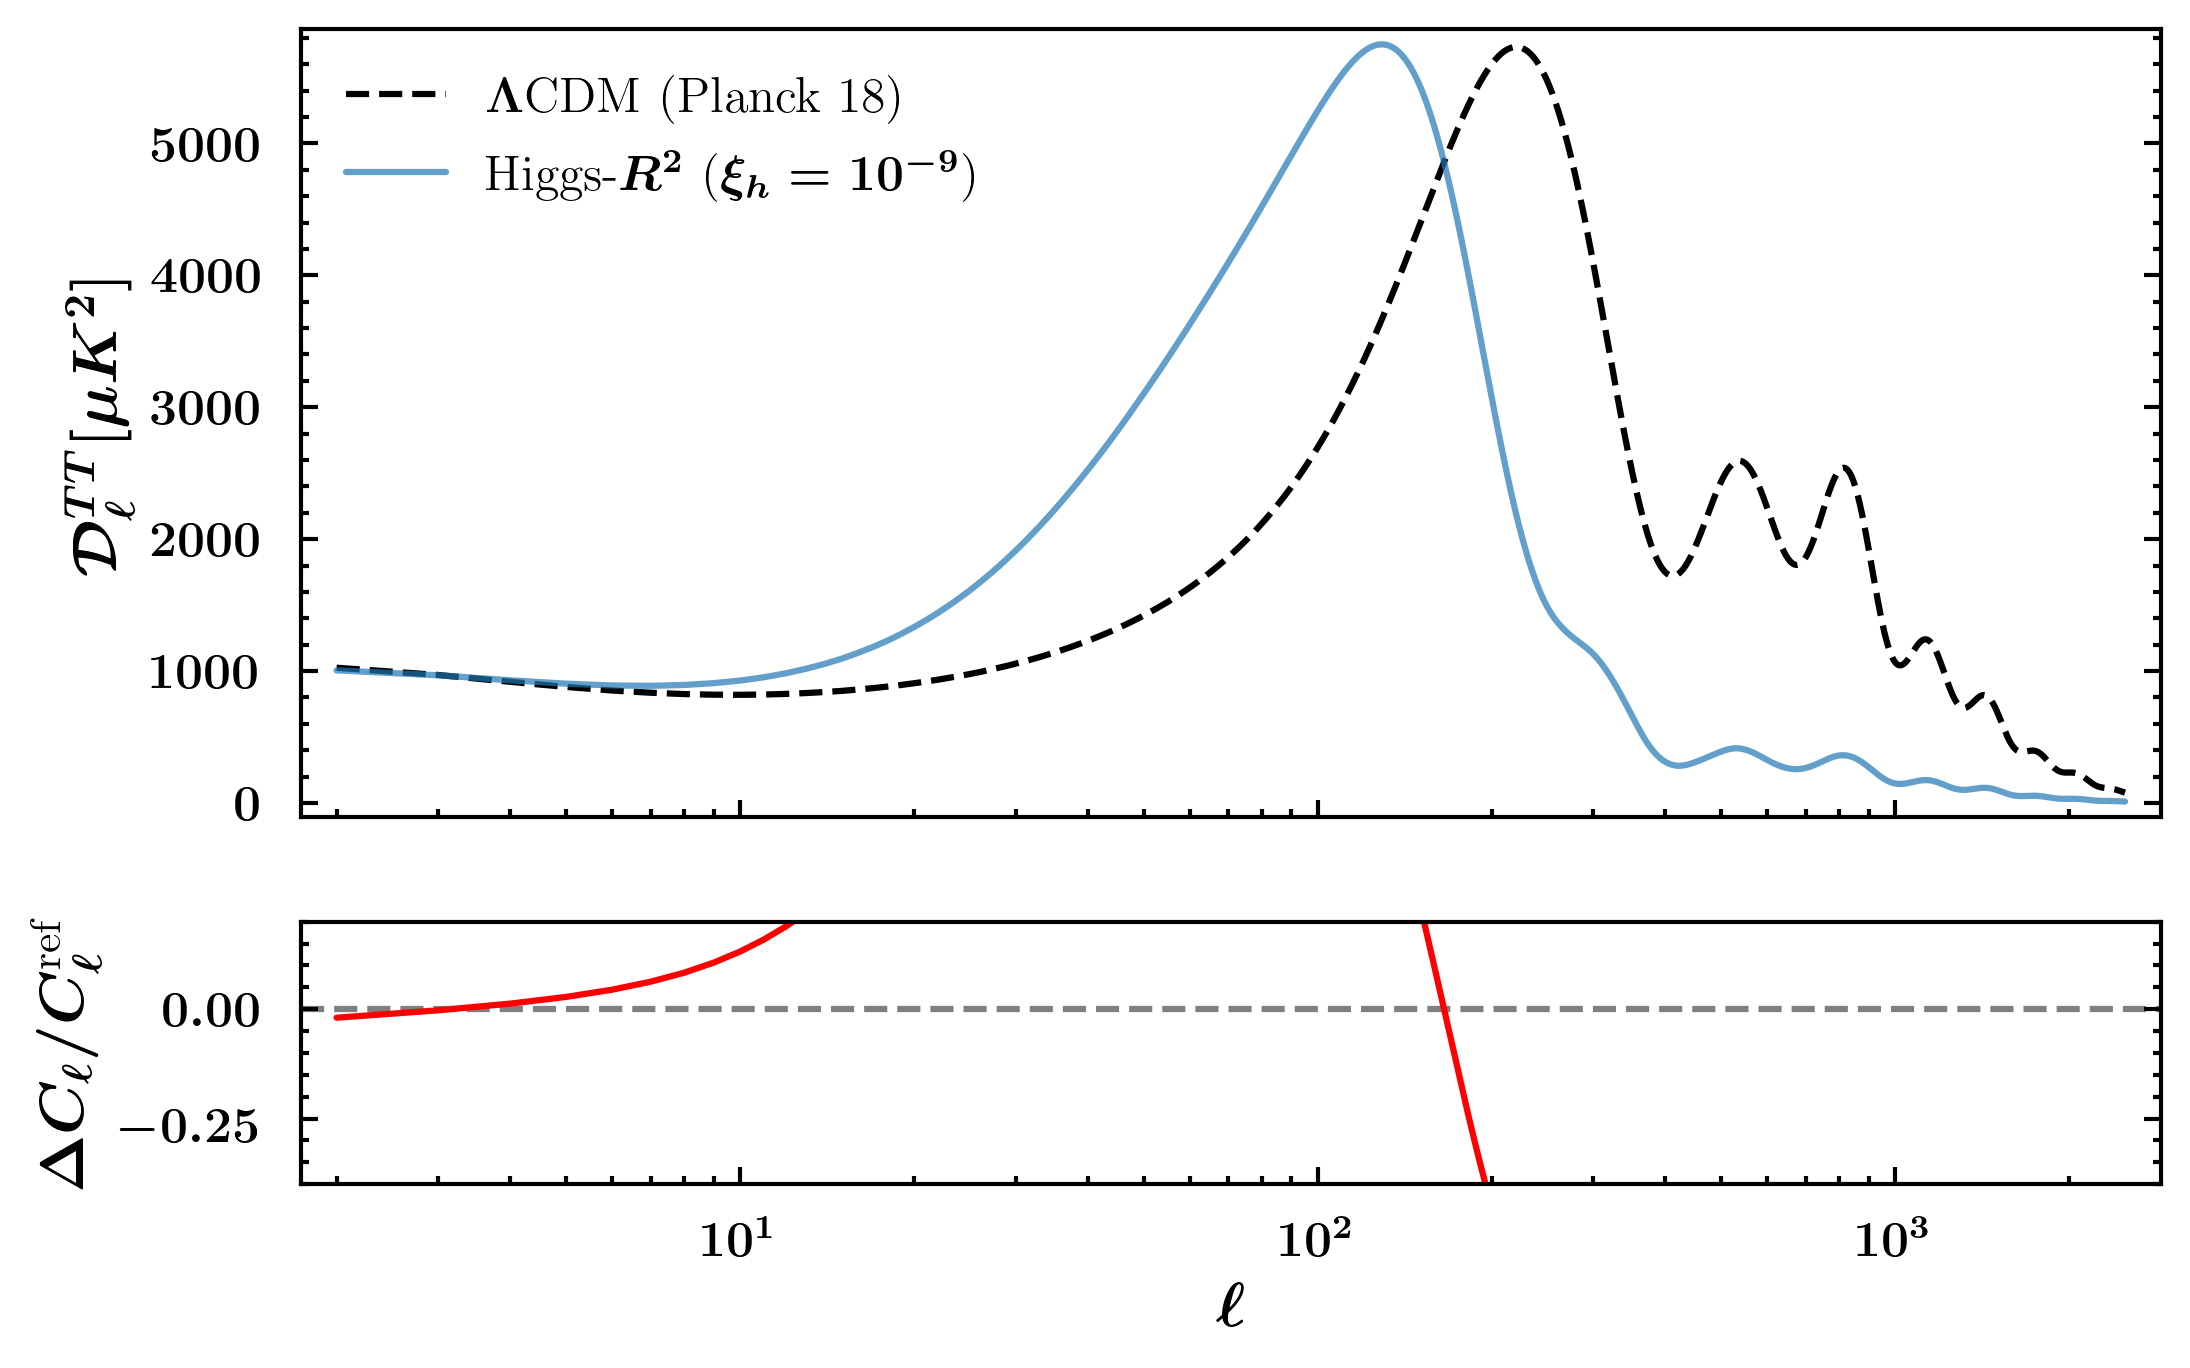

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1,  sharex=True, gridspec_kw={'height_ratios': [3, 1]})


ax1.plot(ll, clTT_ref, 'k--', label=r'$\Lambda$CDM (Planck 18)', )
ax1.plot(ll, clTT_model, label=r'Higgs-$R^2$ ($\xi_h = 10^{-9}$)', alpha = 0.7)
ax1.set_ylabel(r'$\mathcal{D}_\ell^{TT} [\mu K^2]$')
#ax1.set_title(r'Comparación Directa: Higgs-$R^2$ vs Estándar')
ax1.legend(fontsize=12)
#ax1.grid(alpha=0.3)
ax1.set_xscale('log') 

# Panel Inferior: Los Residuos (¡Aquí está la física!)
ax2.axhline(0, color='k', linestyle='--', alpha=0.5)
ax2.plot(ll, diff, 'r-', linewidth=1.5)
ax2.set_ylabel(r'$\Delta C_\ell / C_\ell^\text{ref}$')
ax2.set_xlabel(r' $\ell$')
ax2.set_ylim(-0.4, 0.2) 
#savefig('TT_angular_spectrum')

In [8]:
# --- 5. ENCONTRAR PRIMER PICO ACÚSTICO ---

# Rango razonable para el primer pico
mask = (ll >= 50) & (ll <= 400)

# Modelo Higgs-R^2
peak_idx_model = np.argmax(clTT_model[mask])
ell_peak_model = ll[mask][peak_idx_model]
peak_value_model = clTT_model[mask][peak_idx_model]

# LambdaCDM de referencia
peak_idx_ref = np.argmax(clTT_ref[mask])
ell_peak_ref = ll[mask][peak_idx_ref]
peak_value_ref = clTT_ref[mask][peak_idx_ref]

print("\n======================")
print("   Primer Pico TT")
print("======================")
print(f"Higgs-R^2:")
print(f"  ell_peak = {ell_peak_model:.1f}")
print(f"  D_ell^TT = {peak_value_model:.2f} μK^2")

print("\nΛCDM:")
print(f"  ell_peak = {ell_peak_ref:.1f}")
print(f"  D_ell^TT = {peak_value_ref:.2f} μK^2")
print("======================\n")


   Primer Pico TT
Higgs-R^2:
  ell_peak = 129.0
  D_ell^TT = 5751.16 μK^2

ΛCDM:
  ell_peak = 221.0
  D_ell^TT = 5731.44 μK^2



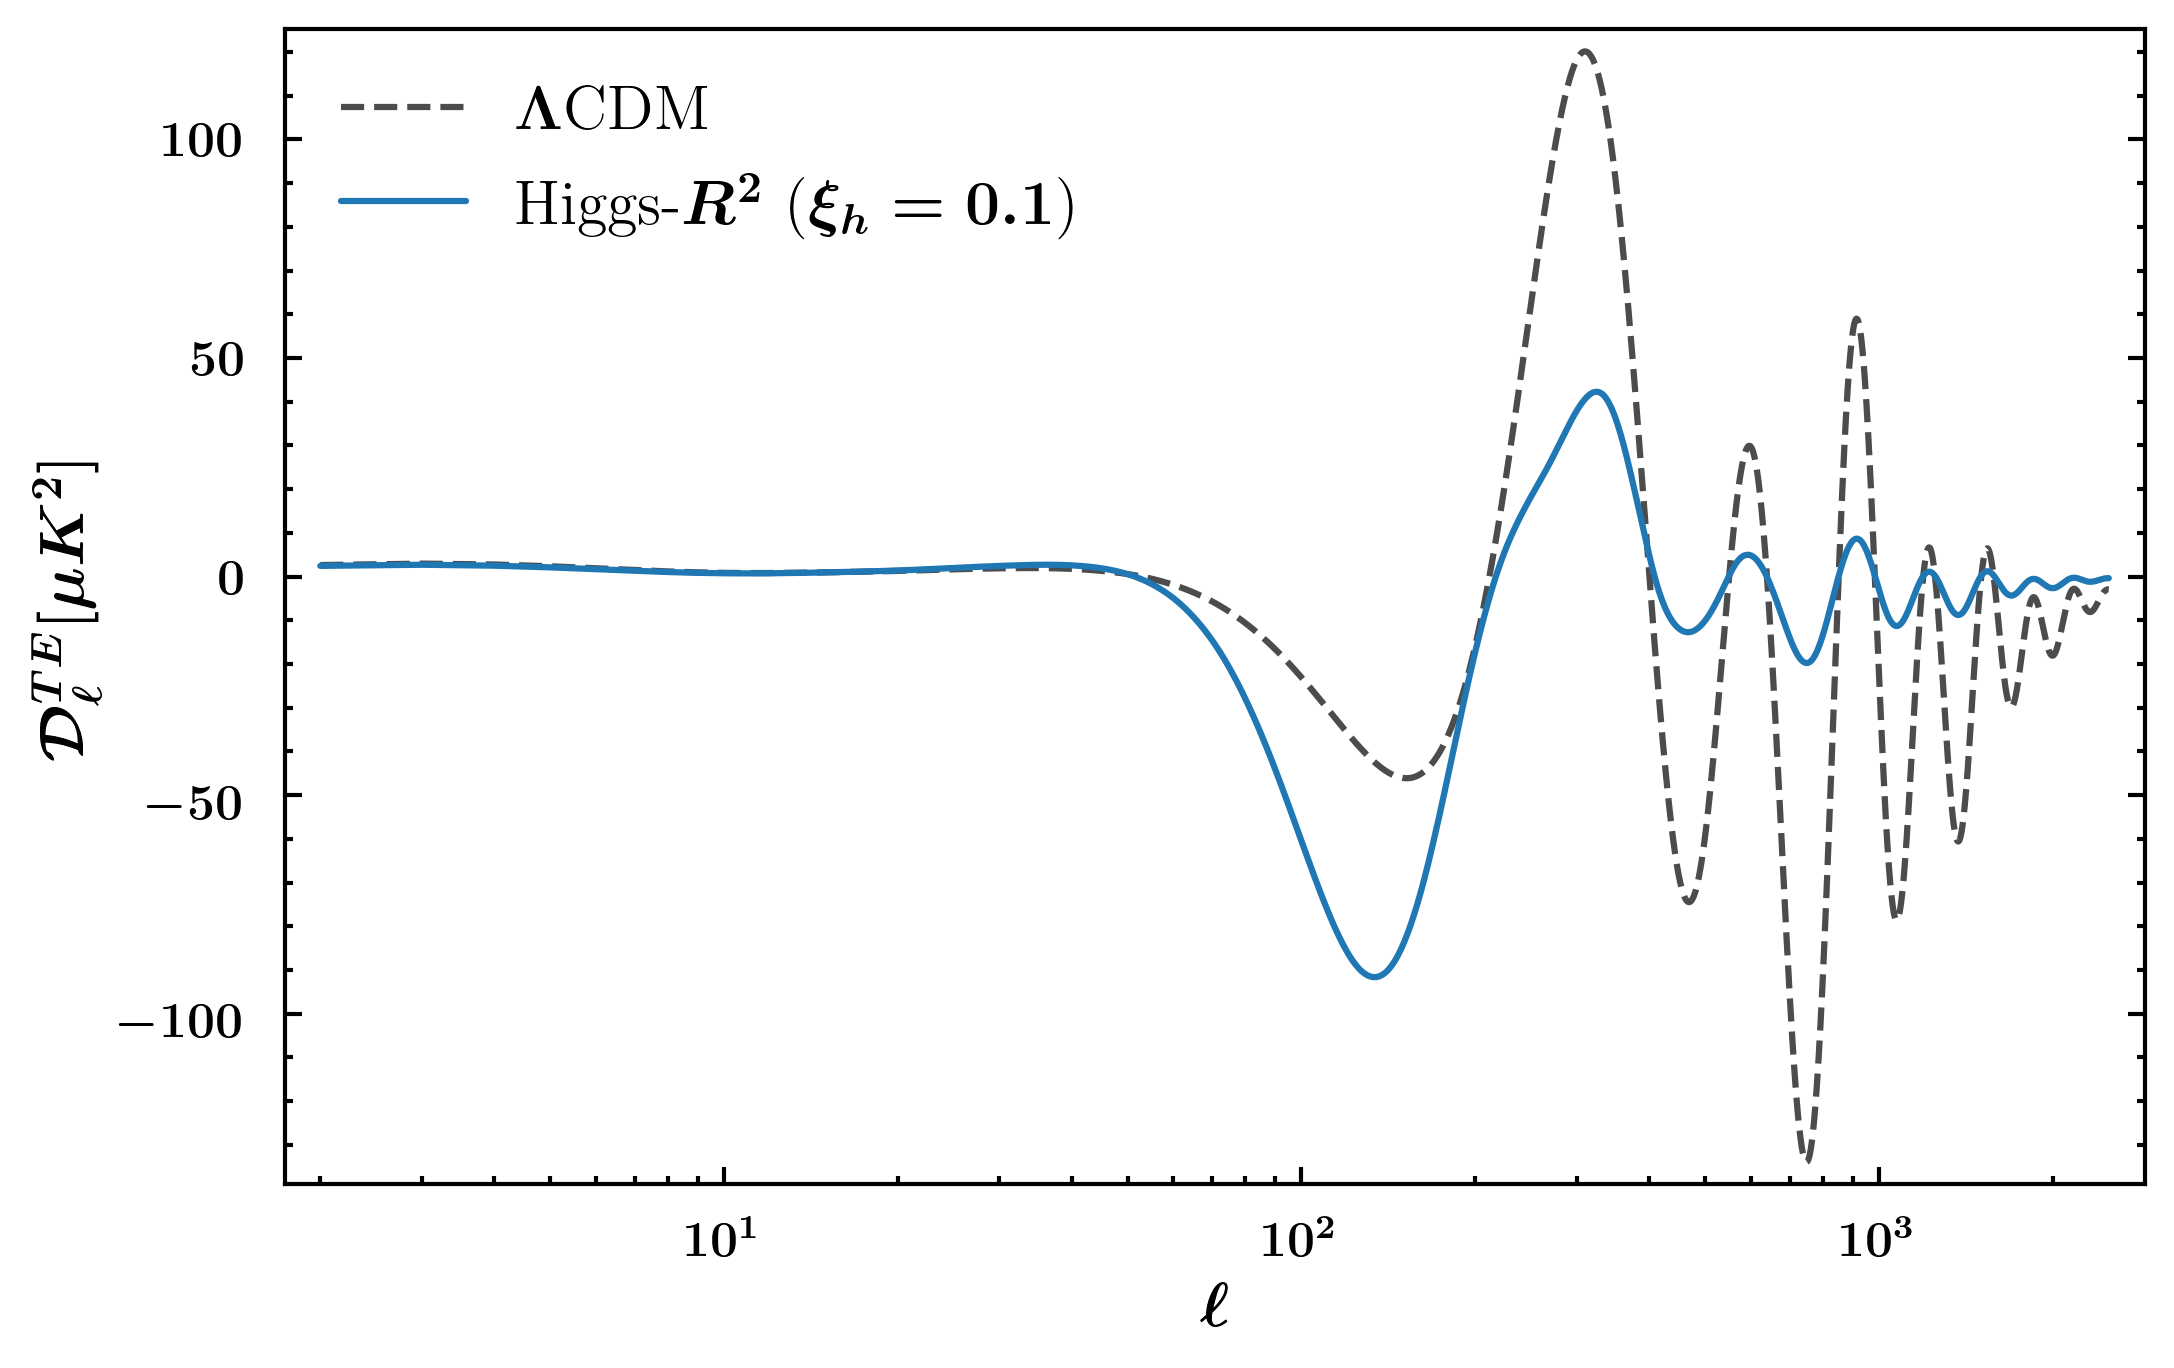

In [9]:
plt.semilogx(ll, clTE_ref, 'k--', label=r'$\Lambda$CDM', alpha=0.7)
plt.semilogx(ll, clTE_model,  label=r'Higgs-$R^2$ ($\xi_h = 0.1$)')
plt.ylabel(r'$\mathcal{D}_\ell^{TE} [\mu K^2]$')
plt.xlabel(r' $\ell$')
plt.legend()
#savefig('TE_angular_spectrum')




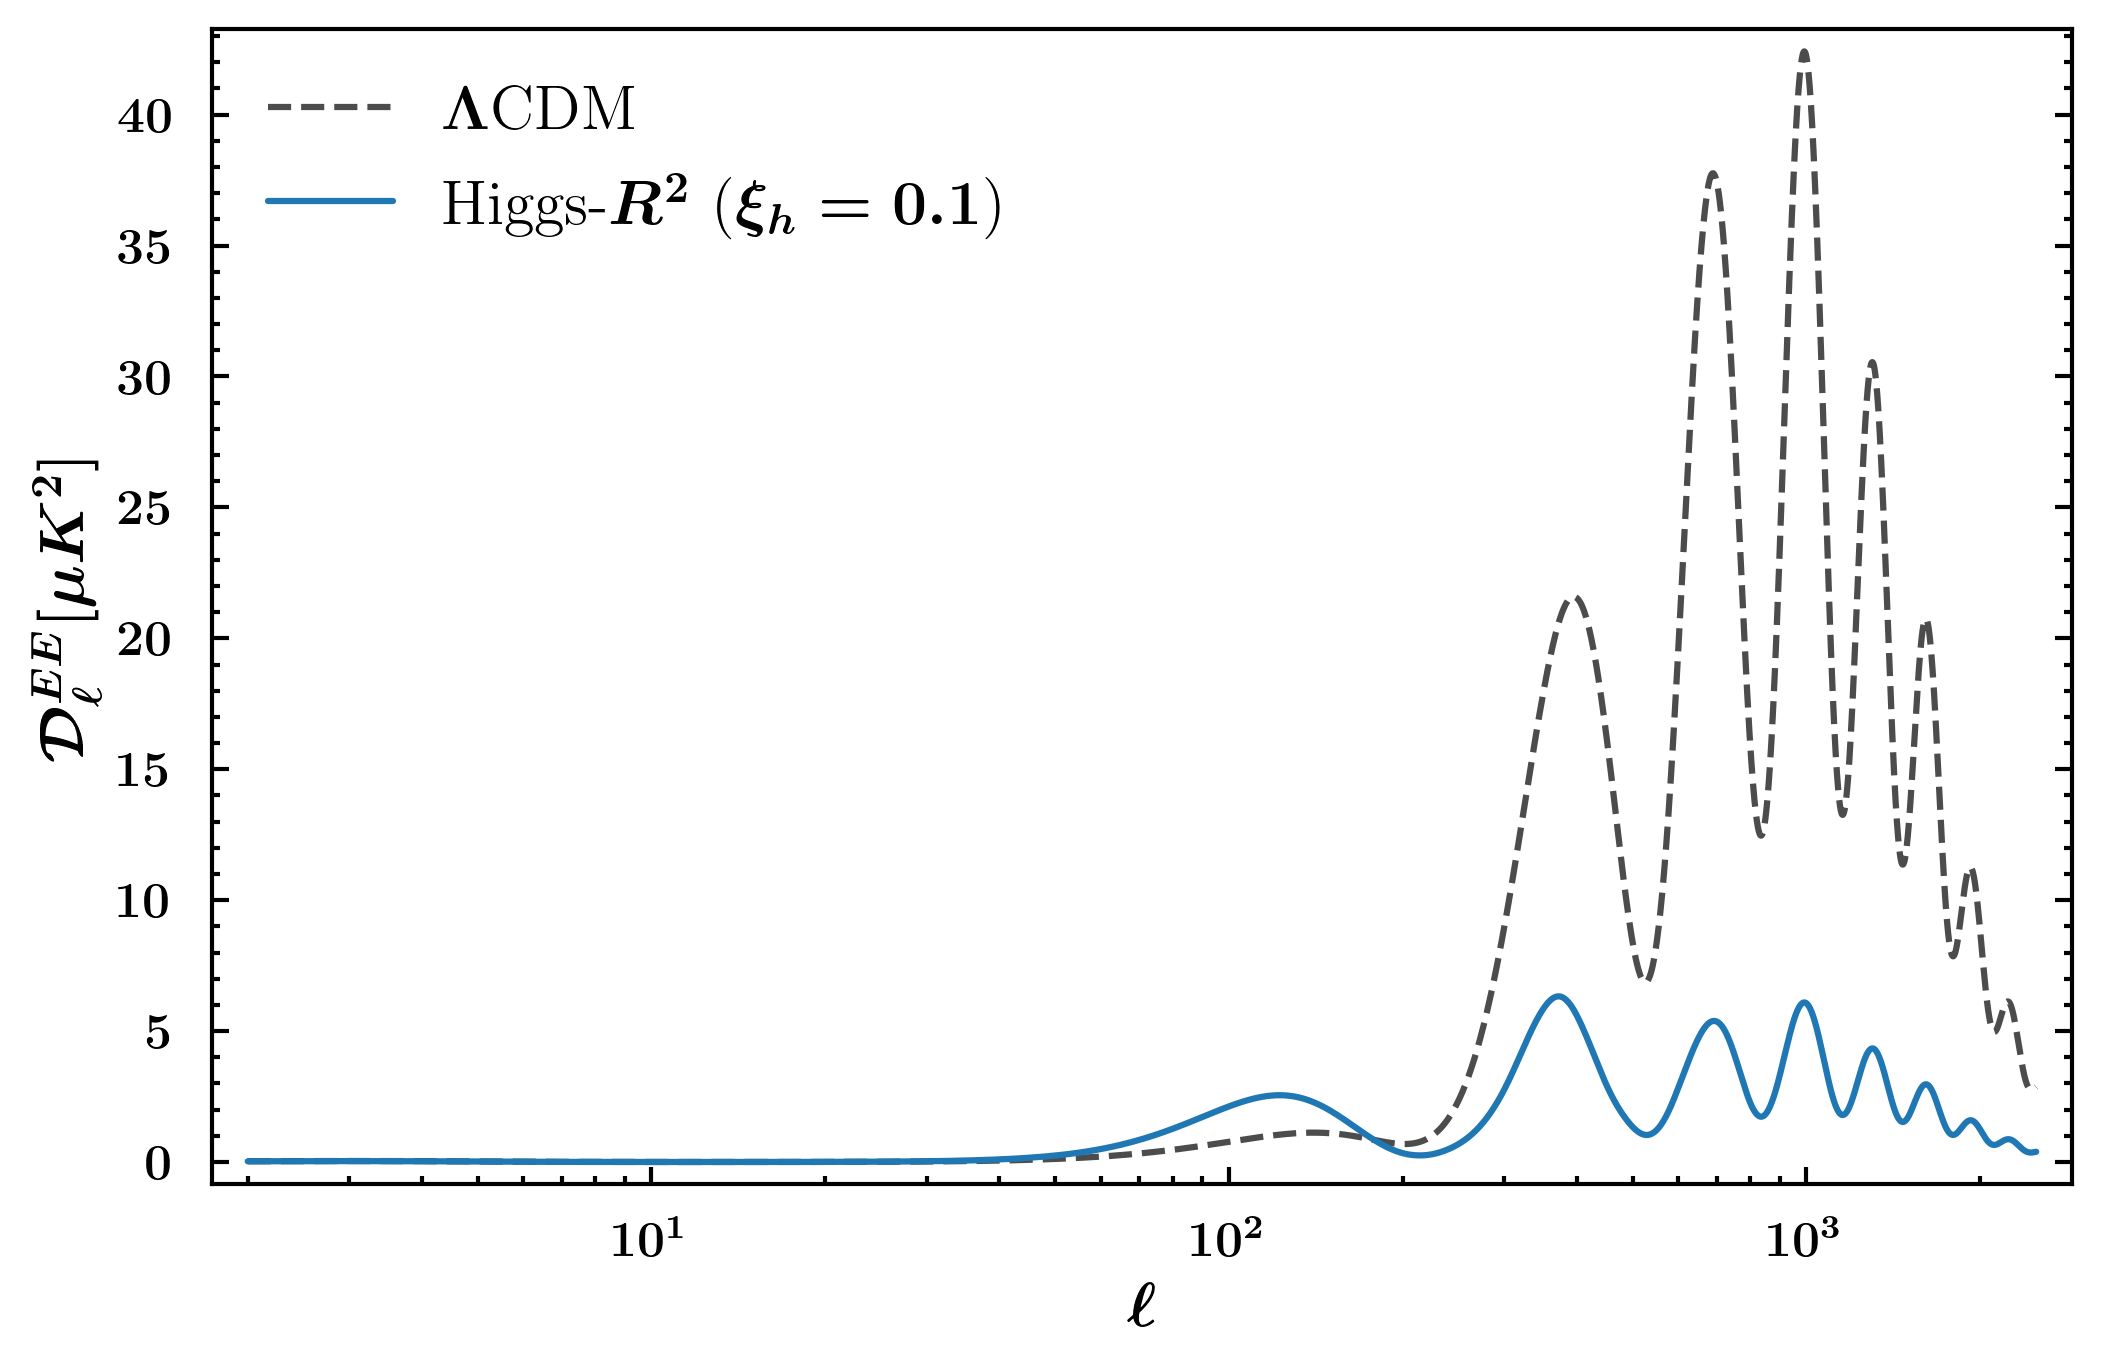

In [10]:
plt.semilogx(ll, clEE_ref, 'k--', label=r'$\Lambda$CDM', alpha=0.7)
plt.semilogx(ll, clEE_model,  label=r'Higgs-$R^2$ ($\xi_h = 0.1$)')
plt.ylabel(r'$\mathcal{D}_\ell^{EE} [\mu K^2]$')
plt.xlabel(r' $\ell$')
plt.legend()
#savefig('EE_angular_spectrum')


Calculando: Higgs-$R^2$ ($\xi_h = 10^{-9})$...
Calculando: Higgs-$R^2$ ($\xi_h = 0.1$)...
Calculando LambdaCDM de referencia...
✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Paper/Figures/TT_angular_spectrum.pdf


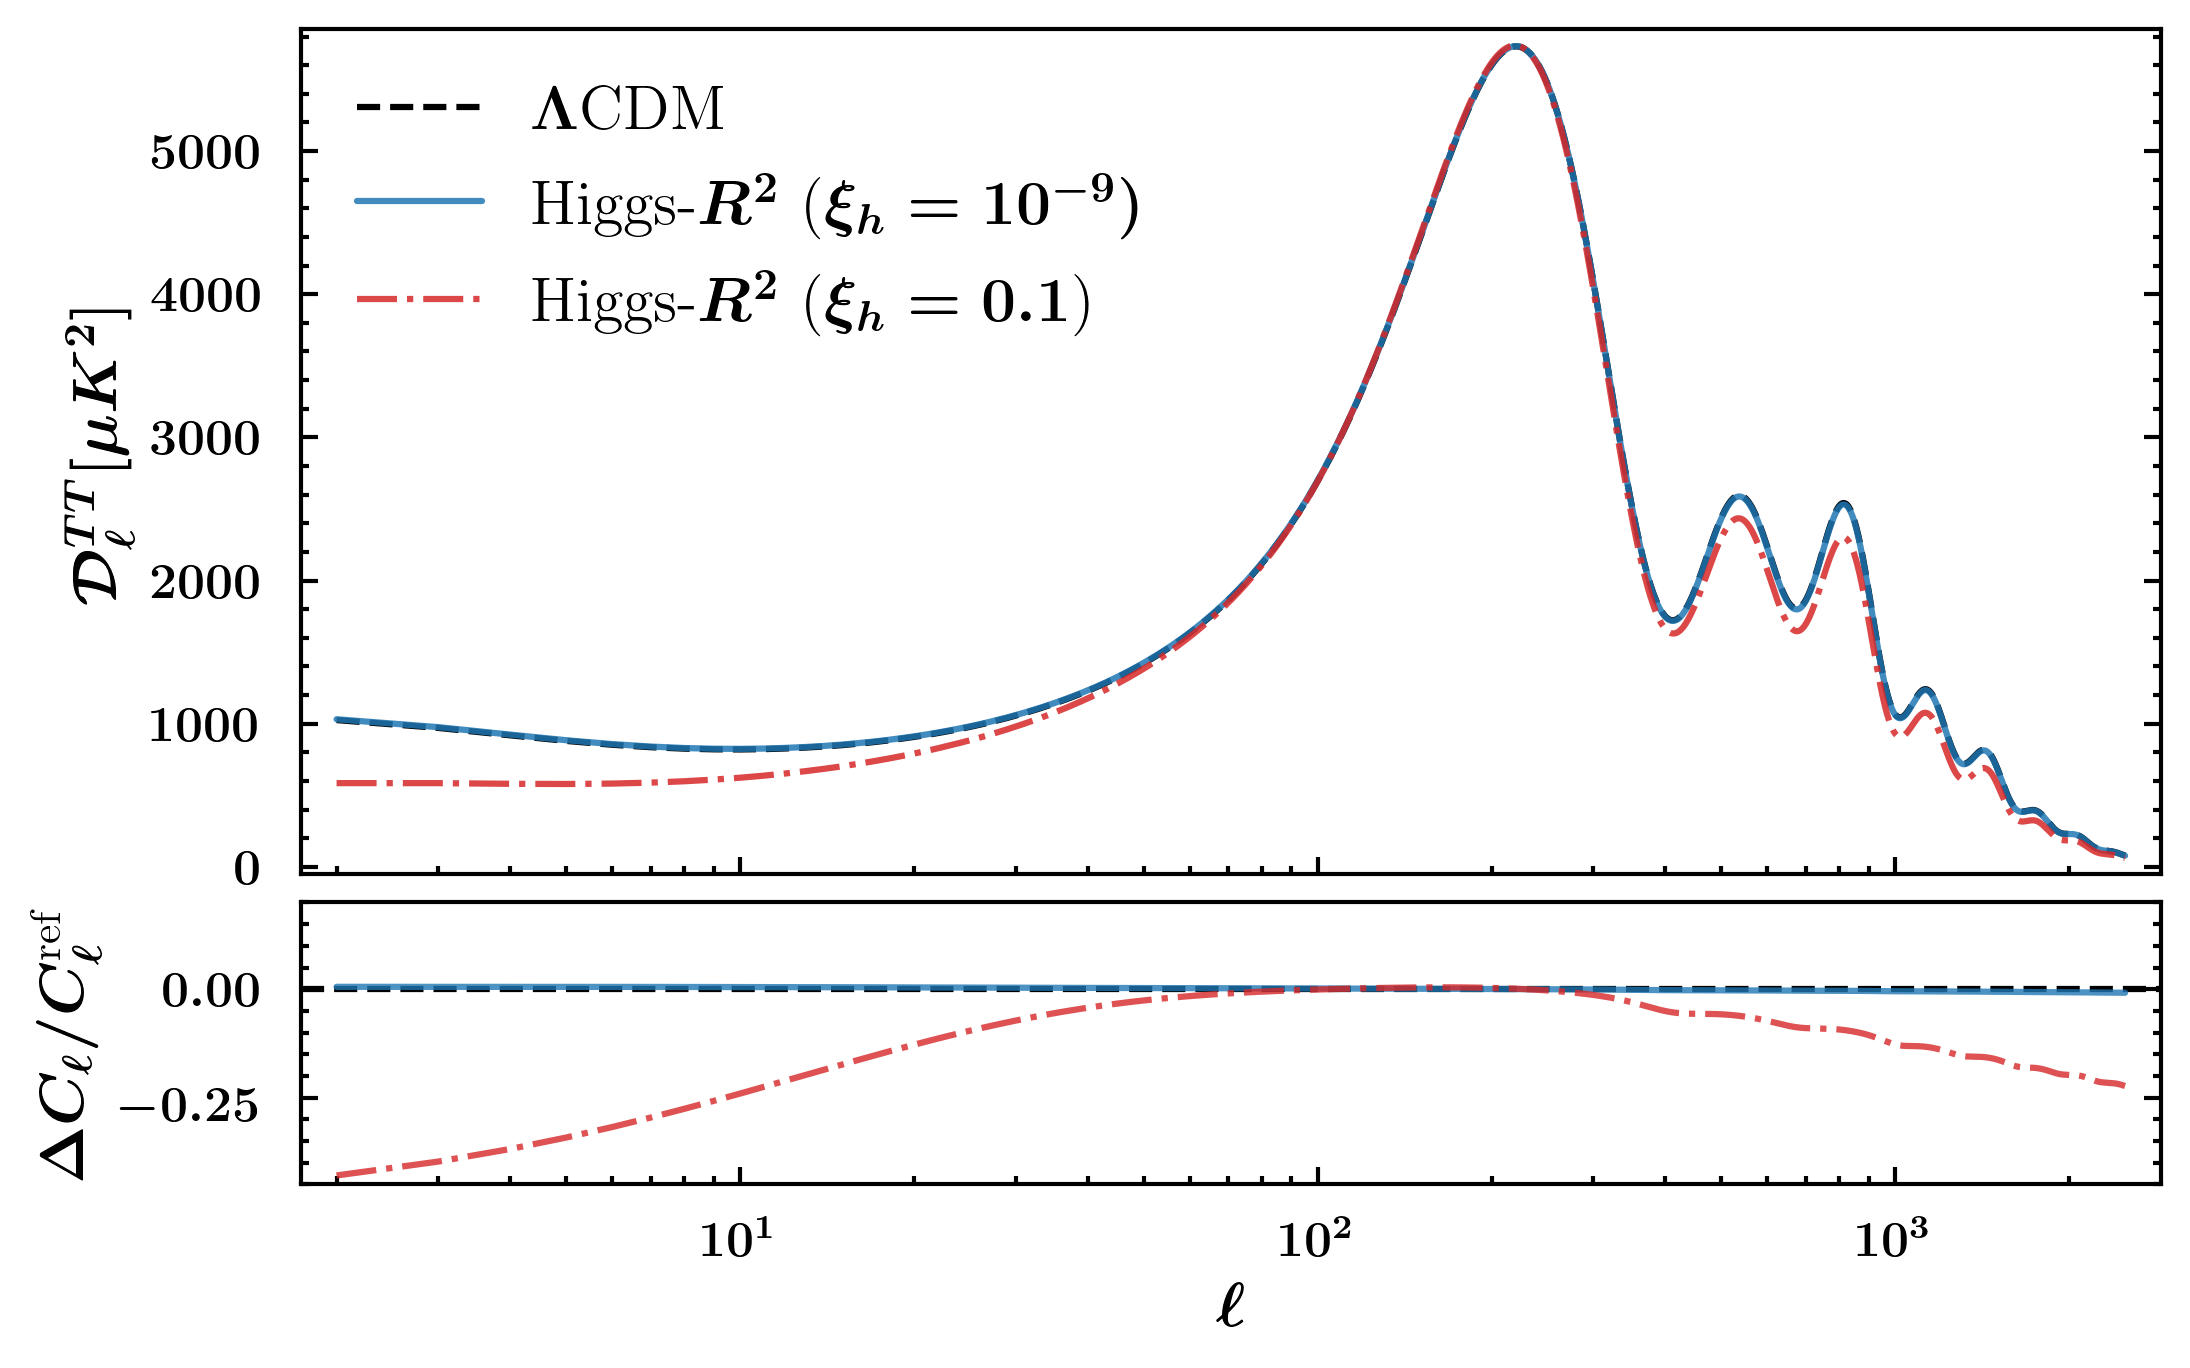

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# --- 1. CONFIGURACIÓN COMÚN ---
common_params = {
    'h': 0.6736,
    'omega_b': 0.02237,
    'omega_cdm': 0.1200,
    'tau_reio': 0.0544,
    'output': 'tCl,pCl,lCl',
    'lensing': 'yes',
    'l_max_scalars': 2500,
}

# Factor de conversión a muK^2 (lo definimos antes para usarlo luego)
Tcmb = 2.7255e6
def get_dl_factor(ell_array):
    return ell_array * (ell_array + 1) / (2 * np.pi) * (Tcmb**2)

# --- 2. DEFINICIÓN DE TUS MODELOS (Rutas y Estilos) ---
# Aquí definimos una lista con tus dos casos para procesarlos en orden
# Formato: (Ruta del archivo, Etiqueta para la leyenda, Color, Estilo de línea)
mis_modelos = [
    {
        'ruta': '/Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Analysis/Pr_dense_input_NORMALIZADO5.dat',
        'label': r'Higgs-$R^2$ ($\xi_h = 10^{-9})$',
        'ls': '-'
    },
    {
        'ruta': '/Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Analysis/Pr_dense_input_N50_NORMALIZADO.dat',
        'label': r'Higgs-$R^2$ ($\xi_h = 0.1$)',
        'ls': '-.'
    }
]

# Diccionario para guardar los resultados
resultados = {}

# --- 3. BUCLE DE CÁLCULO (Tus Modelos) ---
for modelo in mis_modelos:
    print(f"Calculando: {modelo['label']}...")
    
    params_model = common_params.copy()
    params_model.update({
        'P_k_ini type': 'external_Pk',
        'command': f"cat '{modelo['ruta']}'"
    })
    
    cosmo = Class()
    cosmo.set(params_model)
    cosmo.compute()
    cls = cosmo.lensed_cl(2500)
    
    # Guardamos los datos procesados
    ll = cls['ell'][2:]
    factor = get_dl_factor(ll)
    
    resultados[modelo['label']] = {
        'll': ll,
        'tt': cls['tt'][2:] * factor,
        'ee': cls['ee'][2:] * factor,
        'te': cls['te'][2:] * factor,

        'ls': modelo['ls']
    }
    
    cosmo.struct_cleanup() # ¡Muy importante limpiar entre corridas!

# --- 4. CÁLCULO DE REFERENCIA (LambdaCDM) ---
print("Calculando LambdaCDM de referencia...")
params_ref = common_params.copy()
params_ref.update({
    'A_s': 2.1e-9,
    'n_s': 0.9649
})

cosmo_ref = Class()
cosmo_ref.set(params_ref)
cosmo_ref.compute()
cls_ref = cosmo_ref.lensed_cl(2500)

ll_ref = cls_ref['ell'][2:]
factor_ref = get_dl_factor(ll_ref)

ref_data = {
    'tt': cls_ref['tt'][2:] * factor_ref,
    'ee': cls_ref['ee'][2:] * factor_ref,
    'te': cls_ref['te'][2:] * factor_ref
}
cosmo_ref.struct_cleanup()

# --- 5. GRAFICAR ---
# Creamos la figura con 2 paneles (Espectro arriba, Residuos abajo)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, 
                               gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})

# --- PANEL SUPERIOR: Espectros Absolutos ---
# 1. Graficar Referencia
ax1.plot(ll_ref, ref_data['tt'], 'k--', label=r'$\Lambda\text{CDM}$')

# 2. Graficar tus modelos
for label, datos in resultados.items():
    ax1.plot(datos['ll'], datos['tt'], 
          linestyle=datos['ls'], 
             label=label, alpha = 0.85)

ax1.set_ylabel(r'$\mathcal{D}_\ell^{TT} [\mu K^2]$')
ax1.legend( loc='upper left') # O 'best'
ax1.set_xscale('log')

# --- PANEL INFERIOR: Residuos (Diferencia Relativa) ---
# Línea base cero
ax2.axhline(0, color='k', linestyle='--')

# Graficar residuos para cada modelo
for label, datos in resultados.items():
    # Calculamos residuo relativo: (Modelo - Ref) / Ref
    # Asumimos que los 'ell' son idénticos (CLASS suele devolver el mismo rango si l_max es igual)
    diff = (datos['tt'] - ref_data['tt']) / ref_data['tt']
    
    ax2.plot(datos['ll'], diff, 
 linestyle=datos['ls'], 
             alpha = 0.8)

ax2.set_ylabel(r'$\Delta C_\ell / C_\ell^\text{ref}$')
ax2.set_xlabel(r'$\ell$')

# Ajustes de límites para ver bien los residuos
# Si los residuos son grandes (como el dip), quizás quieras aumentar esto o quitarlo
ax2.set_ylim(-0.45, 0.2) 
ax2.minorticks_on()
savefig('TT_angular_spectrum')




Calculando: Higgs-$R^2$ (Benchmark)...
Calculando: Higgs-$R^2$ (N=50)...
Calculando referencia LambdaCDM...
Generando gráfica de TT...


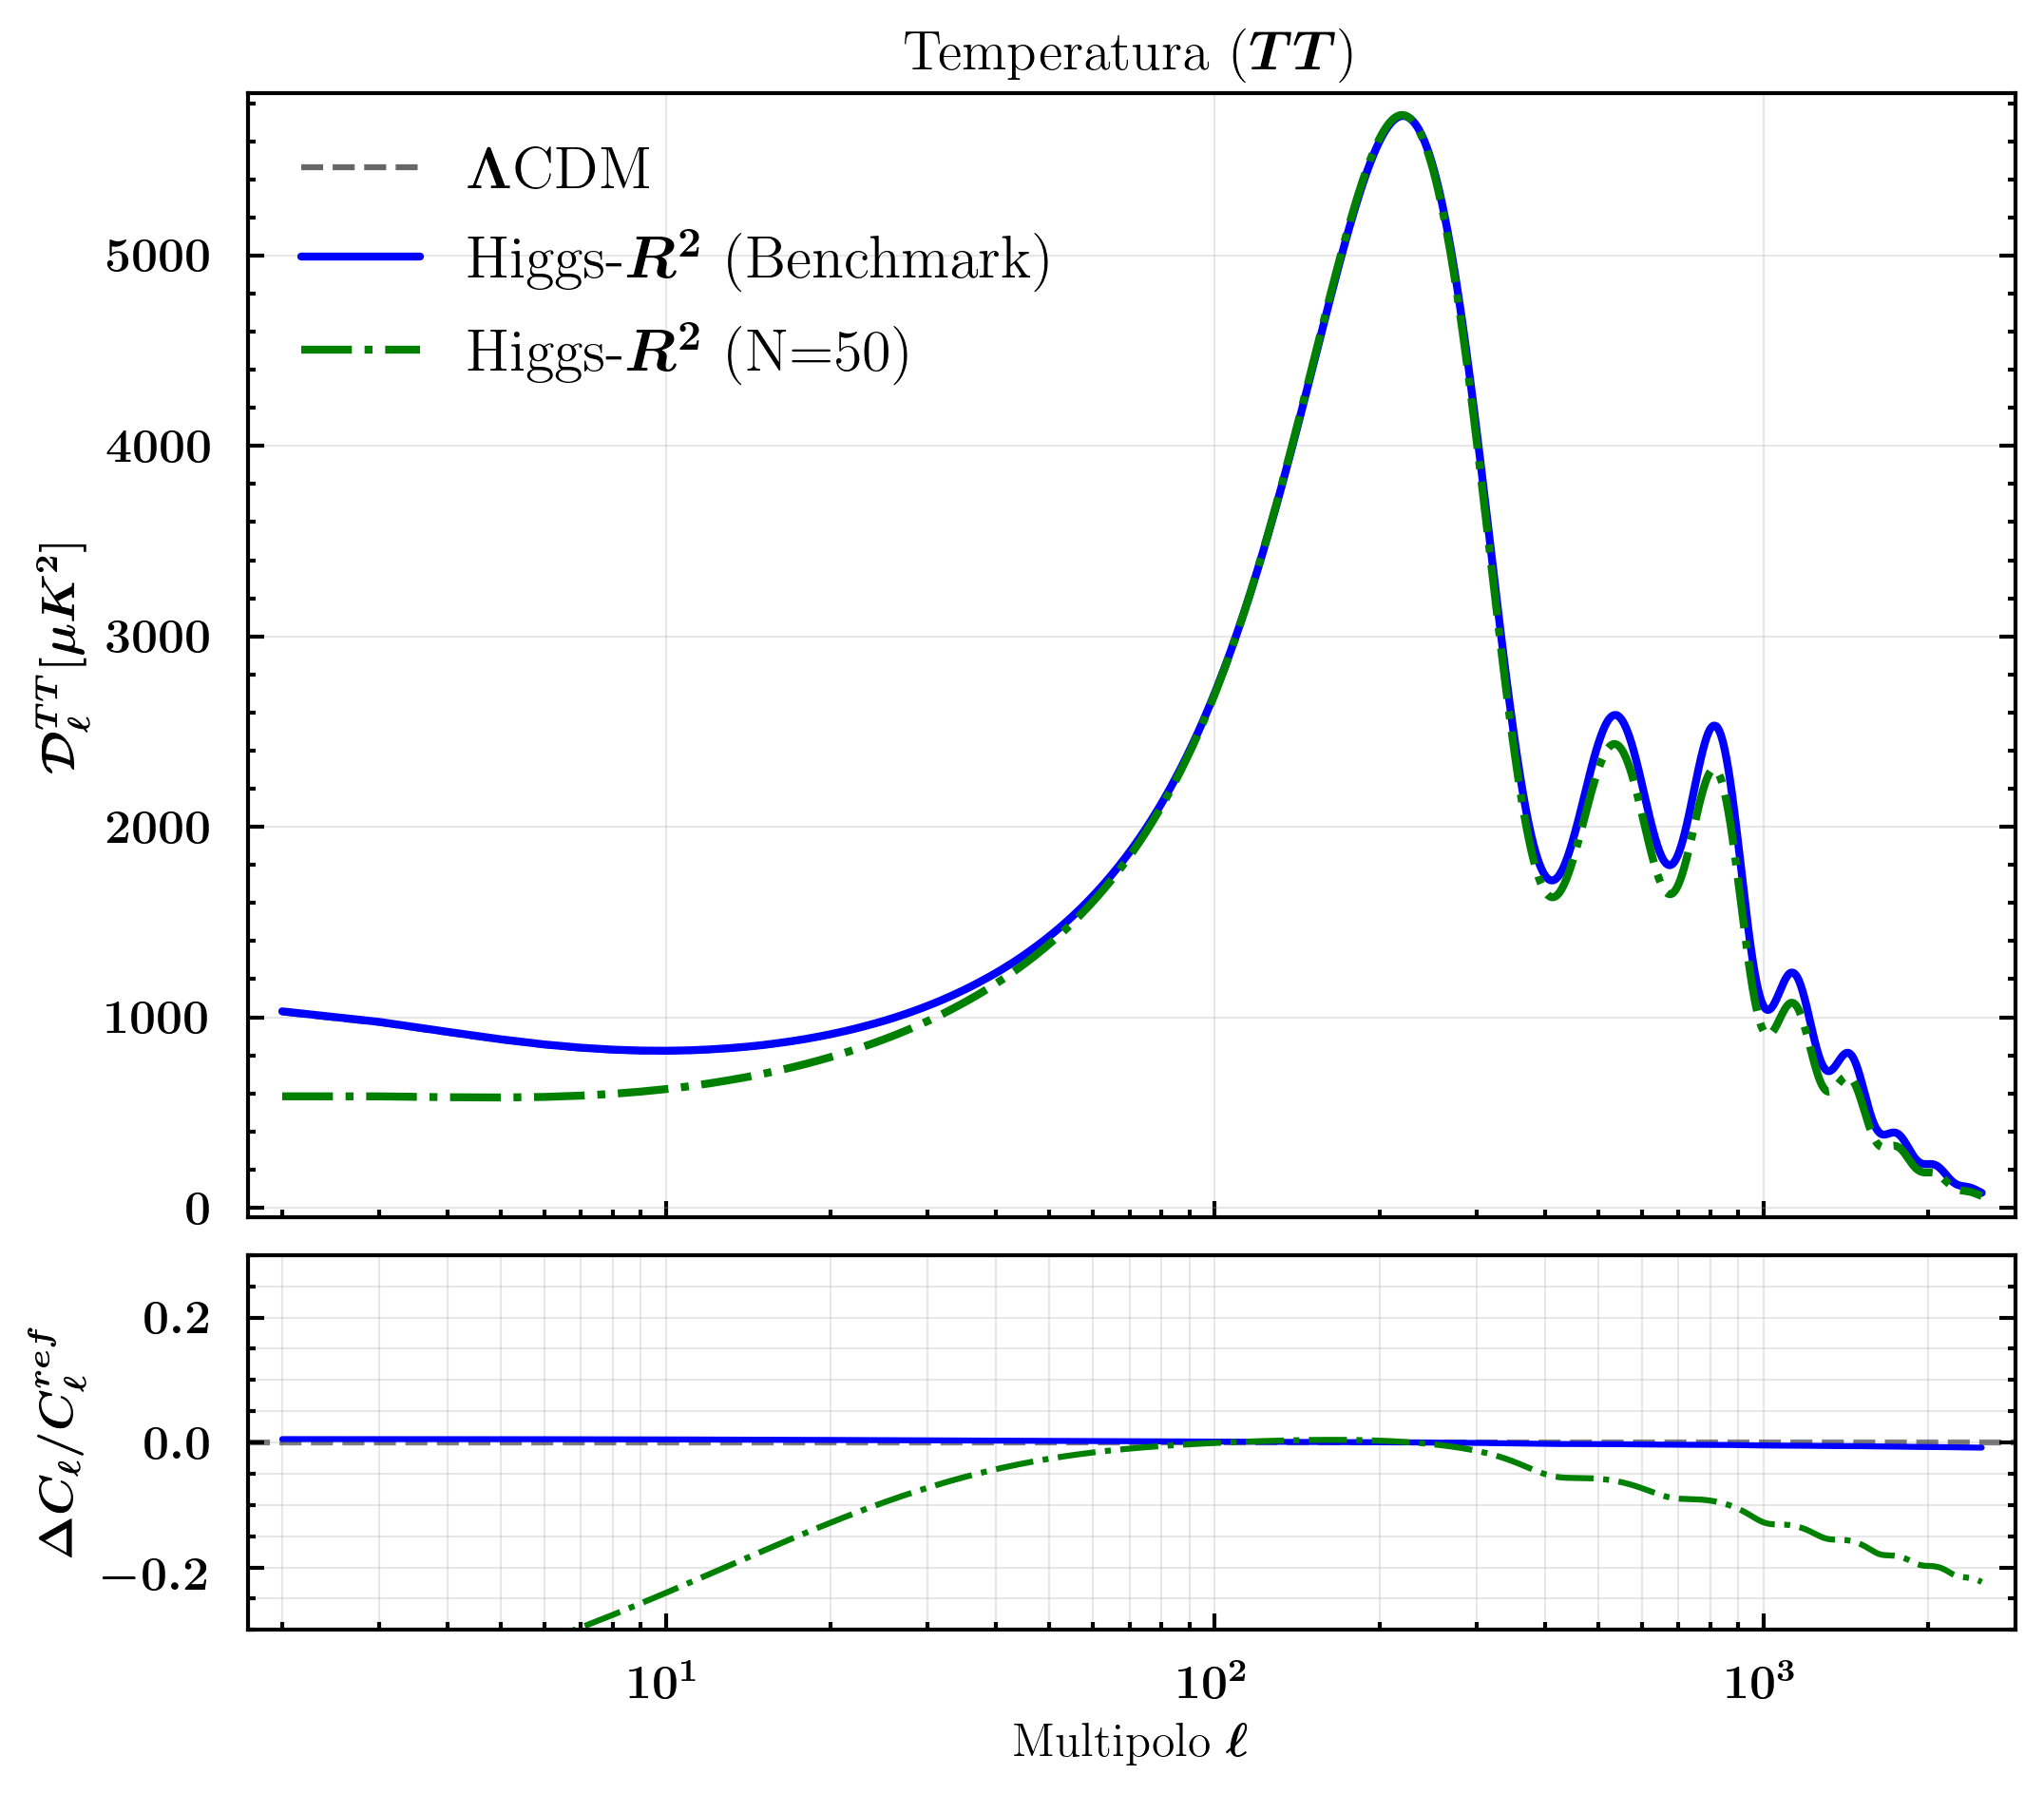

Generando gráfica de TE...


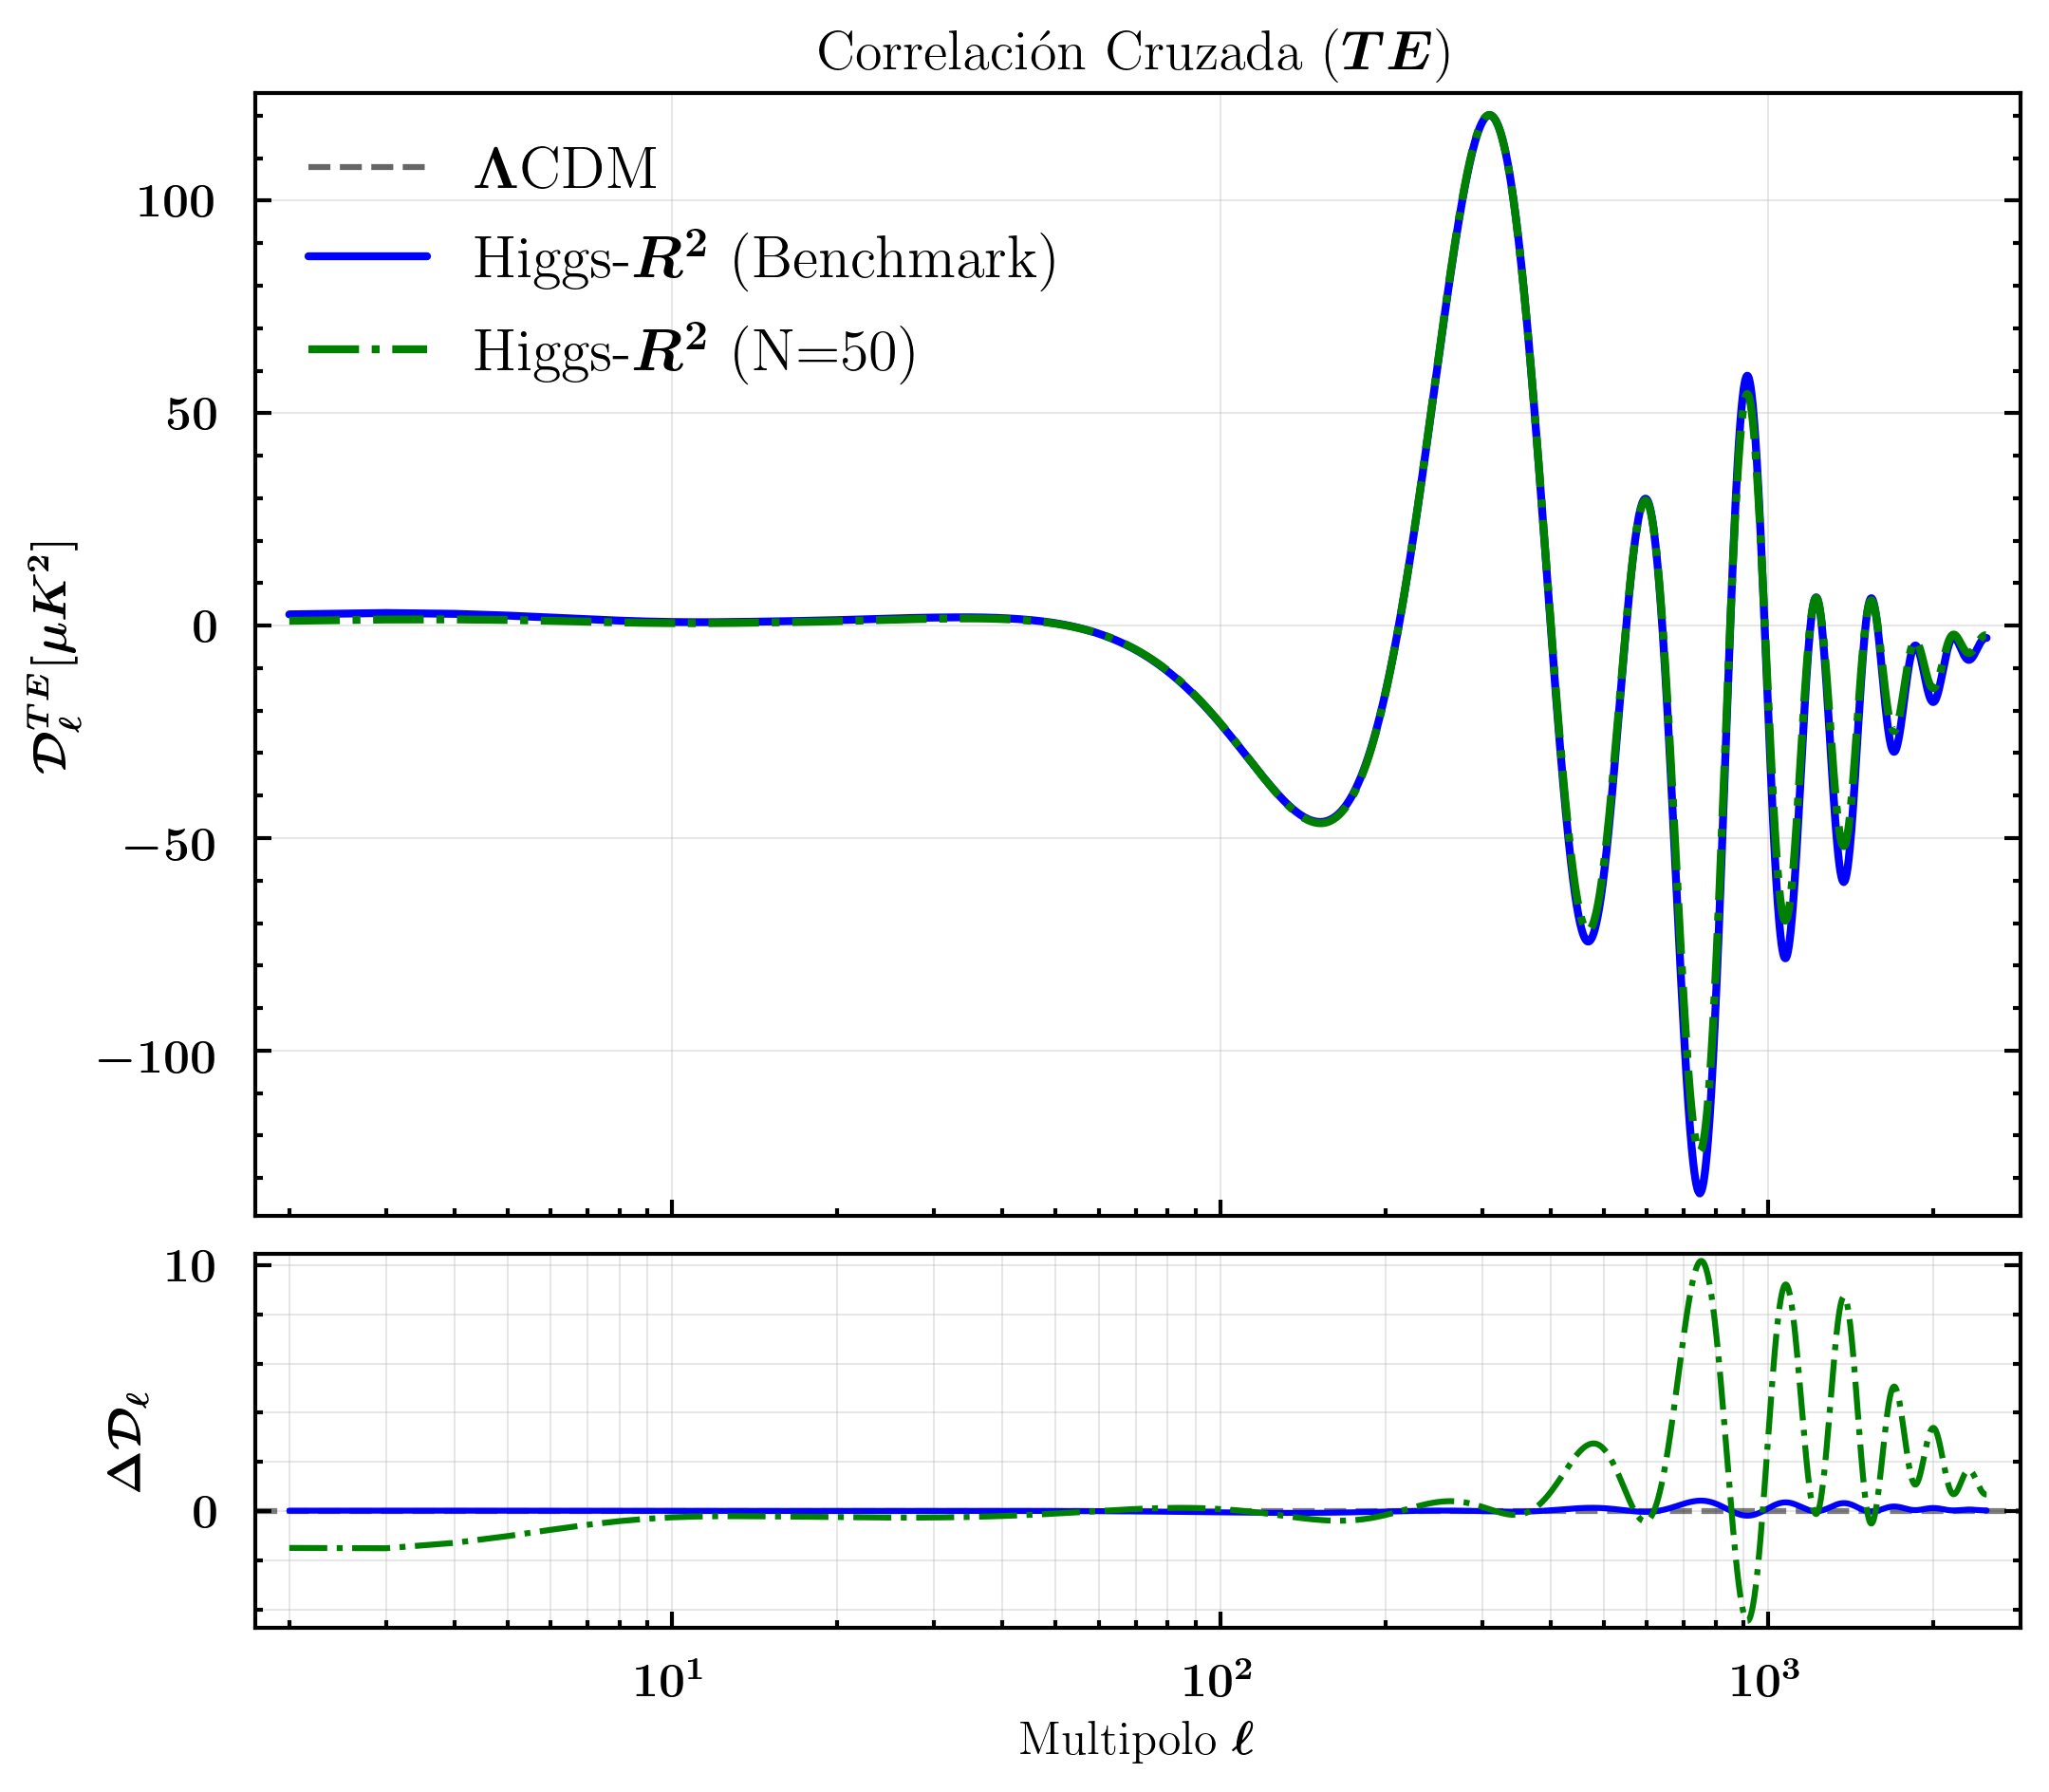

Generando gráfica de EE...


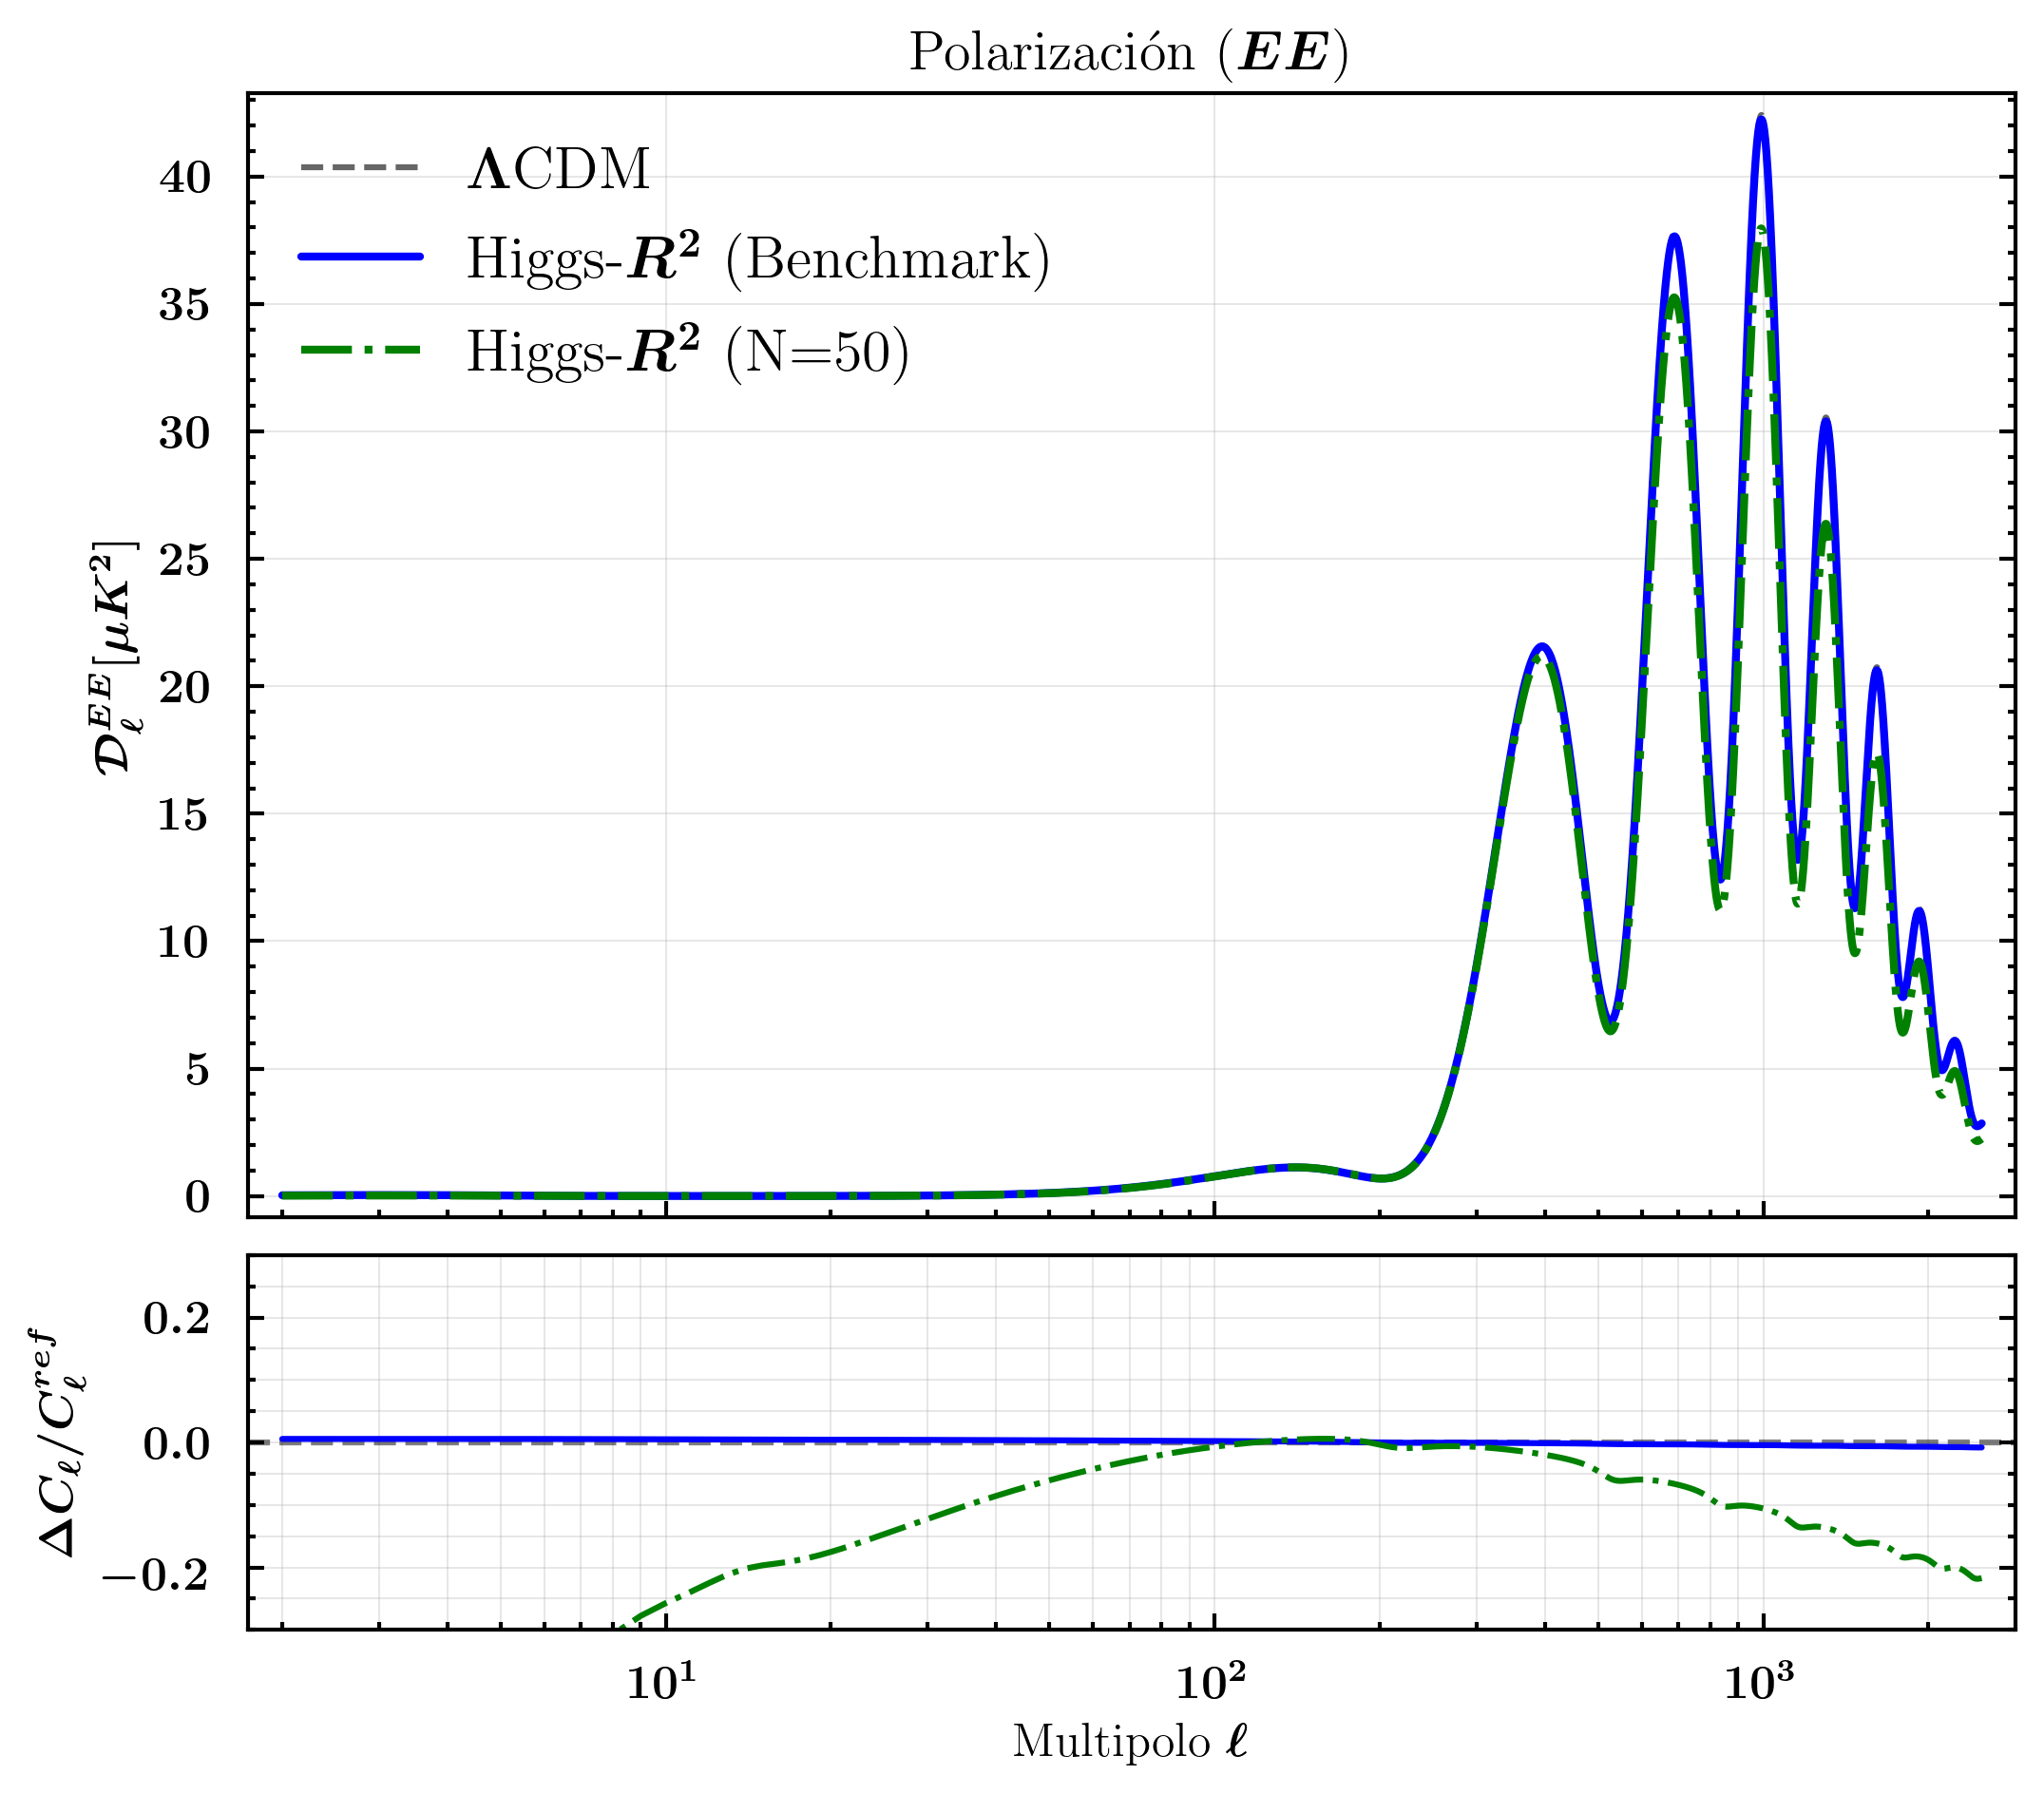

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# --- 1. CONFIGURACIÓN ---
common_params = {
    'h': 0.6736,
    'omega_b': 0.02237,
    'omega_cdm': 0.1200,
    'tau_reio': 0.0544,
    'output': 'tCl,pCl,lCl',
    'lensing': 'yes',
    'l_max_scalars': 2500,
}

Tcmb = 2.7255e6
def get_dl_factor(ell_array):
    return ell_array * (ell_array + 1) / (2 * np.pi) * (Tcmb**2)

# --- 2. TUS MODELOS ---
mis_modelos = [
    {
        'ruta': '/Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Analysis/Pr_dense_input_NORMALIZADO5.dat',
        'label': r'Higgs-$R^2$ (Benchmark)',
        'color': 'blue',
        'ls': '-'
    },
    {
        'ruta': '/Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Analysis/Pr_dense_input_N50_NORMALIZADO.dat',
        'label': r'Higgs-$R^2$ (N=50)',
        'color': 'green',
        'ls': '-.'
    }
]

# --- 3. CÁLCULOS ---
resultados = {}

# A) Calcular Modelos Propios
for modelo in mis_modelos:
    print(f"Calculando: {modelo['label']}...")
    params = common_params.copy()
    params.update({'P_k_ini type': 'external_Pk', 'command': f"cat '{modelo['ruta']}'"})
    
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    cls = cosmo.lensed_cl(2500)
    
    ll = cls['ell'][2:]
    fac = get_dl_factor(ll)
    
    resultados[modelo['label']] = {
        'll': ll,
        'tt': cls['tt'][2:] * fac,
        'ee': cls['ee'][2:] * fac,
        'te': cls['te'][2:] * fac,
        'color': modelo['color'],
        'ls': modelo['ls']
    }
    cosmo.struct_cleanup()

# B) Calcular Referencia LambdaCDM
print("Calculando referencia LambdaCDM...")
params_ref = common_params.copy()
params_ref.update({'A_s': 2.1e-9, 'n_s': 0.9649})

cosmo_ref = Class()
cosmo_ref.set(params_ref)
cosmo_ref.compute()
cls_ref = cosmo_ref.lensed_cl(2500)
ll_ref = cls_ref['ell'][2:]
fac_ref = get_dl_factor(ll_ref)

ref_data = {
    'tt': cls_ref['tt'][2:] * fac_ref,
    'ee': cls_ref['ee'][2:] * fac_ref,
    'te': cls_ref['te'][2:] * fac_ref
}
cosmo_ref.struct_cleanup()

# --- 4. BUCLE DE GRAFICADO (TT, TE, EE) ---
modos_a_graficar = [
    {'key': 'tt', 'title': r'Temperatura ($TT$)', 'ylabel': r'$\mathcal{D}_\ell^{TT} [\mu K^2]$'},
    {'key': 'te', 'title': r'Correlación Cruzada ($TE$)', 'ylabel': r'$\mathcal{D}_\ell^{TE} [\mu K^2]$'},
    {'key': 'ee', 'title': r'Polarización ($EE$)', 'ylabel': r'$\mathcal{D}_\ell^{EE} [\mu K^2]$'}
]

for modo in modos_a_graficar:
    key = modo['key']
    
    # Crear figura nueva para cada modo
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 7), 
                                   gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})
    
    # --- PANEL SUPERIOR: Espectros ---
    ax1.plot(ll_ref, ref_data[key], 'k--', label=r'$\Lambda$CDM', alpha=0.6)
    
    for label, datos in resultados.items():
        ax1.plot(datos['ll'], datos[key], 
                 color=datos['color'], linestyle=datos['ls'], 
                 label=label, linewidth=2)
    
    ax1.set_ylabel(modo['ylabel'], fontsize=12)
    ax1.set_title(modo['title'], fontsize=14)
    ax1.legend(loc='best')
    ax1.grid(alpha=0.3)
    ax1.set_xscale('log')
    
    # --- PANEL INFERIOR: Residuos ---
    ax2.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    for label, datos in resultados.items():
        # ESTRATEGIA DE RESIDUOS:
        # Para TE usamos diferencia absoluta (porque cruza por cero y diverge)
        # Para TT y EE usamos diferencia relativa (%)
        if key == 'te':
            diff = datos[key] - ref_data[key]
            ylabel_res = r'$\Delta \mathcal{D}_\ell$'
        else:
            diff = (datos[key] - ref_data[key]) / ref_data[key]
            ylabel_res = r'$\Delta C_\ell / C_\ell^{ref}$'
        
        ax2.plot(datos['ll'], diff, 
                 color=datos['color'], linestyle=datos['ls'])
    
    ax2.set_ylabel(ylabel_res, fontsize=12)
    ax2.set_xlabel(r'Multipolo $\ell$', fontsize=12)
    ax2.grid(alpha=0.3, which='both')
    
    # Ajuste de límites para residuos (opcional)
    if key != 'te':
        ax2.set_ylim(-0.3, 0.3) # Para ver bien el dip
    
    print(f"Generando gráfica de {key.upper()}...")
    plt.show()